### Import and Functions

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io.wavfile import write
from scipy.signal import butter, lfilter, resample
import IPython.display as ipd

def pulse_wave_with_duty_cycle(frequency, duration, fs, duty_cycle):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    wave = np.sign(np.sin(2 * np.pi * frequency * t))
    on_samples = int(fs * duration * duty_cycle)
    wave[:on_samples] = 1
    return wave

def pulse_wave(frequency, duration, fs):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    wave = np.sign(np.sin(2 * np.pi * frequency * t))
    return wave

def triangle_wave(frequency, duration, fs):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    wave = 2 * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5)))
    wave = wave - 1
    return wave

def noise(duration, fs):
    return np.random.normal(0, 1, int(fs * duration))

目前可以包含三個八度的音  
freq_scale = 1 
中間是比中央八度  低八度
freq_scale = 0.5   
中間是比中央八度低八度 再低八度
freq_scale = 2  
中間是中央八度 


簡譜的輸入法  
L,M,H代表三個八度中的哪一個八度 + 後面數字則是pitch  
(#升記號  b降記號)  
Do = 1  
Do# = 1.5  
Re = 2  
Mib = 2.5  
Mi = 3  
Fa = 4  
Fa# = 4.5  
So = 5  
So# = 5.5  
La = 6  
Sib = 6.5  
Si = 7  

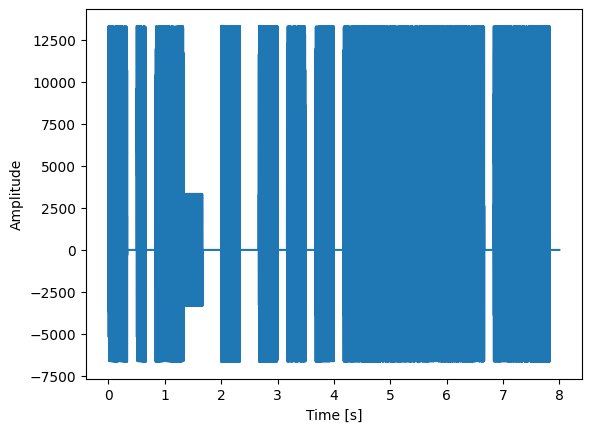

In [2]:

def pitches_convert(pitches):
    if pitches=='0':
        pitches=0
    elif pitches=='1':
        pitches=1
    elif pitches=='1.5':
        pitches=2
    elif pitches=='2':
        pitches=3
    elif pitches=='2.5':
        pitches=4
    elif pitches=='3':
        pitches=5
    elif pitches=='4':
        pitches=6
    elif pitches=='4.5':
        pitches=7
    elif pitches=='5':
        pitches=8
    elif pitches=='5.5':
        pitches=9
    elif pitches=='6':
        pitches=10
    elif pitches=='6.5':
        pitches=11
    elif pitches=='7':
        pitches=12
    
    return pitches


def synthesis_pulse_wave(pitch,beat,fs,BPM,freq_scale):
    amplitude = 10000
    one_beat = 60/BPM
    num_samples = int(one_beat*beat*fs)
    t = np.linspace(0,beat,num_samples,endpoint=False)
    # a = np.linspace(0,1,num_samples,endpoint=False)

    # pitch = pitches_convert(pitch)

    note = pitch
    frequency = 0.5*freq_scale*np.array([0,523.25, 554.36, 587.32, 622.25, 659.25, 698.45, 739.98, 783.99, 830.60, 880, 932.32, 987.76])

    if note[0] == 'L':
        octave = note[1:]
        # print("Low octave:", octave)
        octave = int(pitches_convert(octave))
        # print("After convert",octave)
        real_freq = 0.5*frequency[octave]
        # print("freq = ",real_freq)       

    elif note[0] == 'M':
        octave = note[1:]
        # print("High octave:", octave)
        octave = int(pitches_convert(octave))
        real_freq = frequency[octave]
        # print("After convert",octave)
        # print("freq = ", real_freq) 

    elif note[0] == 'H':
        octave = note[1:]
        # print("Standard octave:", octave)
        octave = int(pitches_convert(octave))
        real_freq = 2*frequency[octave]
        # print("After convert",octave)
        # print("freq = ", real_freq) 

    elif note[0] == '0':
        octave = int(0)
        real_freq = frequency[octave]
        # print("Silence")
    else:
        print("Error in Note, Please check the note")

    # fade_in = np.linspace(0, 1, int(0.08*num_samples), endpoint=False)
    # fade_out = np.linspace(1, 0, int(0.08*num_samples), endpoint=False)
    # amplitude = np.concatenate([fade_in, np.ones(len(t)-2*len(fade_in)), fade_out])
    # x = amplitude*a*np.sign(np.sin(2*np.pi*frequency[pitch-1]*t))
    # x = amplitude*a*np.sin(2*np.pi*frequency[pitch]*t)
    # x = amplitude*a*np.sign(np.sin(2*np.pi*real_freq*t)) 
        
    # Pulse-wave 50% duty cycle
    x = amplitude*np.sign(np.sin(2*np.pi*real_freq*t))  

    return x


def synthesis_triangle_wave(pitch,beat,fs,BPM,freq_scale):
    amplitude = 10000
    one_beat = 60/BPM
    num_samples = int(one_beat*beat*fs)
    t = np.linspace(0,beat,num_samples,endpoint=False)

    note = pitch
    frequency = 0.5*freq_scale*np.array([0,523.25, 554.36, 587.32, 622.25, 659.25, 698.45, 739.98, 783.99, 830.60, 880, 932.32, 987.76])

    if note[0] == 'L':
        octave = note[1:]
        octave = int(pitches_convert(octave))
        real_freq = 0.5*frequency[octave]      

    elif note[0] == 'M':
        octave = note[1:]
        octave = int(pitches_convert(octave))
        real_freq = frequency[octave]

    elif note[0] == 'H':
        octave = note[1:]
        octave = int(pitches_convert(octave))
        real_freq = 2*frequency[octave]

    elif note[0] == '0':
        octave = int(0)
        real_freq = frequency[octave]
    else:
        print("Error in Note, Please check the note")
 
    # Triangle_wave
    x = amplitude*2*np.abs(2*(t*real_freq-np.floor(t*real_freq+0.5)))
    x = x-1  
    return x





fs = 44100
BPM = 180

# Mario notes:
pitches_pulse_1 = np.array(['M3','M3',0,'M3',0,'M1','M3',
                    'M5',0,'L5',0,
                    'M1',0,'L5',0,'L3',
                    0,'L6','L7','L6.5','L6',
                    'L5','M3','M5','M6','M4','M5',
                    0,'M3','M1','M2','L7',0])

beats_pulse_1 = np.array([0.5,0.5,0.5,0.5,0.5,0.5,1,
                  1,1,1,1,
                  1,0.5,1,0.5,1,
                  0.5,1,1,0.5,1,
                  2/3,2/3,2/3,1,0.5,0.5,
                  0.5,1,0.5,0.5,1,0.5])

pitches_pulse_2 = np.array(['L2','L2',0,'L2',0,'L2','L2',
                    0,0,'L5',0,
                    'L5',0,'L3',0,'L1',
                    0,'L4','L5','L4.5','L4',
                    'L3','L1','L3','L4','L2','L3',
                    0,'L1','L6','L7','L5',0])


beats_pulse_2 = np.array([0.5,0.5,0.5,0.5,0.5,0.5,1,
                  1,1,1,1,
                  1,0.5,1,0.5,1,
                  0.5,1,1,0.5,1,
                  2/3,2/3,2/3,1,0.5,0.5,
                  0.5,1,0.5,0.5,1,0.5])

pitches_triangle = np.array(['L2','L2',0,'L2',0,'L2','L2',
                    0,0,'L5',0,
                    'L5',0,'L3',0,'L1',
                    0,'L4','L5','L4.5','L4',
                    'L3','L1','L3','L4','L2','L3',
                    0,'L1','L6','L7','L5',0])


beats_triangle = np.array([0.5,0.5,0.5,0.5,0.5,0.5,1,
                  1,1,1,1,
                  1,0.5,1,0.5,1,
                  0.5,1,1,0.5,1,
                  2/3,2/3,2/3,1,0.5,0.5,
                  0.5,1,0.5,0.5,1,0.5])

pitches_noise = np.array(['L2','L2',0,'L2',0,'L2','L2',
                    0,0,'L5',0,
                    'L5',0,'L3',0,'L1',
                    0,'L4','L5','L4.5','L4',
                    'L3','L1','L3','L4','L2','L3',
                    0,'L1','L6','L7','L5',0])


beats_noise = np.array([0.5,0.5,0.5,0.5,0.5,0.5,1,
                  1,1,1,1,
                  1,0.5,1,0.5,1,
                  0.5,1,1,0.5,1,
                  2/3,2/3,2/3,1,0.5,0.5,
                  0.5,1,0.5,0.5,1,0.5])


# # EVA notes:
# pitches = np.array(['L2','L4','L5','L4','L5','L5','M1',
#                     'L6.5','L6','L5','L6',0,
#                     'L6','M1','M2','L5','L4',
#                     'M1','L6','M1','M1','M2'])


# beats = np.array([1,1,0.75,0.75,0.5,
#                   1,0.5,0.5,0.25,0.5,0.75,0.5,
#                   1,1,0.75,0.75,0.5,
#                   1,0.5,0.5,0.75,1.25])

freq_scale = 0.5

y = np.array([])
for i in range(np.size(pitches_pulse_1)):
    pulse_wave_1 = synthesis_pulse_wave(pitches_pulse_1[i],beats_pulse_1[i],fs,BPM,freq_scale)
    pulse_wave_2 = synthesis_pulse_wave(pitches_pulse_2[i],beats_pulse_2[i],fs,BPM,freq_scale)
    triangle_wave = synthesis_triangle_wave(pitches_triangle[i],beats_triangle[i],fs,BPM,freq_scale)
    # noise = synthesis_noise(pitches_noise[i],beats_noise[i],fs,BPM,freq_scale)
    x = (pulse_wave_1+pulse_wave_2+triangle_wave)/3
    y = np.append(y,x)

ipd.display(ipd.Audio(y,rate=fs))

t = np.arange(0, y.size/fs, 1/fs)
plt.plot(t, y, label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


In [3]:
def pitches_convert(pitches):
    if pitches=='0':
        pitches=0
    elif pitches=='1':
        pitches=1
    elif pitches=='1.5':
        pitches=2
    elif pitches=='2':
        pitches=3
    elif pitches=='2.5':
        pitches=4
    elif pitches=='3':
        pitches=5
    elif pitches=='4':
        pitches=6
    elif pitches=='4.5':
        pitches=7
    elif pitches=='5':
        pitches=8
    elif pitches=='5.5':
        pitches=9
    elif pitches=='6':
        pitches=10
    elif pitches=='6.5':
        pitches=11
    elif pitches=='7':
        pitches=12
    
    return pitches


def synthesis(pitch,beat,fs,BPM,freq_scale):
    amplitude = 30000
    one_beat = 60/BPM
    num_samples = int(one_beat*beat*fs)
    t = np.linspace(0,beat,num_samples,endpoint=False)
    # a = np.linspace(0,1,num_samples,endpoint=False)

    # pitch = pitches_convert(pitch)

    note = pitch
    
    frequency = freq_scale*np.array([0,523.25, 554.36, 587.32, 622.25, 659.25, 698.45, 739.98, 783.99, 830.60, 880, 932.32, 987.76])

    if note[0] == 'L':
        octave = note[1:]
        # print("Low octave:", octave)
        octave = int(pitches_convert(octave))
        # print("After convert",octave)
        real_freq = 0.5*frequency[octave]
        # print("freq = ",real_freq)       

    elif note[0] == 'M':
        octave = note[1:]
        # print("High octave:", octave)
        octave = int(pitches_convert(octave))
        real_freq = frequency[octave]
        # print("After convert",octave)
        # print("freq = ", real_freq) 

    elif note[0] == 'H':
        octave = note[1:]
        # print("Standard octave:", octave)
        octave = int(pitches_convert(octave))
        real_freq = 2*frequency[octave]
        # print("After convert",octave)
        # print("freq = ", real_freq) 

    elif note[0] == '0':
        octave = int(0)
        real_freq = frequency[octave]
        # print("Silence")
    else:
        print("Error in Note, Please check the note")

    # fade_in = np.linspace(0, 1, int(0.08*num_samples), endpoint=False)
    # fade_out = np.linspace(1, 0, int(0.08*num_samples), endpoint=False)
    # amplitude = np.concatenate([fade_in, np.ones(len(t)-2*len(fade_in)), fade_out])


    # x = amplitude*a*np.sign(np.sin(2*np.pi*frequency[pitch-1]*t))
    # x = amplitude*a*np.sin(2*np.pi*frequency[pitch]*t)
    # x = amplitude*a*np.sign(np.sin(2*np.pi*real_freq*t)) 
        
    # Pulse-wave 50% duty cycle
    x = amplitude*np.sign(np.sin(2*np.pi*real_freq*t))  

    return x




fs = 44100
BPM = 180

# Mario notes:
pitches = np.array(['M3','M3',0,'M3',0,'M1','M3',
                    'M5',0,'L5',0,
                    'M1',0,'L5','L3',
                    0,'L6','L7','L6.5','L6',
                    'L5','M3','M5','M6','M4','M5',
                    0,'M3','M1','M2','L7',0])


beats = np.array([0.5,0.5,0.5,0.5,0.5,0.5,1,
                  1,1,1,1,
                  1,0.5,1,0.5,1,
                  0.5,1,1,0.5,1,
                  0.5,1,1,0.5,1,
                  ])
# # EVA notes:
# pitches = np.array(['L2','L4','L5','L4','L5','L5','M1',
#                     'L6.5','L6','L5','L6',0,
#                     'L6','M1','M2','L5','L4',
#                     'M1','L6','M1','M1','M2'])


# beats = np.array([1,1,0.75,0.75,0.5,
#                   1,0.5,0.5,0.25,0.5,0.75,0.5,
#                   1,1,0.75,0.75,0.5,
#                   1,0.5,0.5,0.75,1.25])

freq_scale = 0.5

y = np.array([])
for i in range(np.size(pitches)):
    x = synthesis(pitches[i],beats[i],fs,BPM,freq_scale)
    y = np.append(y,x)

ipd.display(ipd.Audio(y,rate=fs))

t = np.arange(0, y.size/fs, 1/fs)
plt.plot(t, y, label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


IndexError: index 26 is out of bounds for axis 0 with size 26

直接轉換整組輸入簡譜的 pitches_convert

In [4]:
pitches = np.array([1,1.5,2,2.5,3,4,4.5,5,5.5,6,6.5,7])

def pitches_convert(pitches):
    print(pitches.size)
    for i in range(pitches.size):
        print(i)
        print(pitches[i])
        if pitches[i]==1.5:
            pitches[i]=2
        elif pitches[i]==2:
            pitches[i]=3
        elif pitches[i]==2.5:
            pitches[i]=4
        elif pitches[i]==3:
            pitches[i]=5
        elif pitches[i]==4:
            pitches[i]=6
        elif pitches[i]==4.5:
            pitches[i]=7
        elif pitches[i]==5:
            pitches[i]=8
        elif pitches[i]==5.5:
            pitches[i]=9
        elif pitches[i]==6:
            pitches[i]=10
        elif pitches[i]==6.5:
            pitches[i]=11
        elif pitches[i]==7:
            pitches[i]=12
    
    pitches = pitches.astype(int)
    return pitches

print(pitches_convert(pitches))

12
0
1.0
1
1.5
2
2.0
3
2.5
4
3.0
5
4.0
6
4.5
7
5.0
8
5.5
9
6.0
10
6.5
11
7.0
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [5]:
def pitches_convert(pitches):
    if pitches=='0':
        pitches=0
    elif pitches=='1':
        pitches=1
    elif pitches=='1.5':
        pitches=2
    elif pitches=='2':
        pitches=3
    elif pitches=='2.5':
        pitches=4
    elif pitches=='3':
        pitches=5
    elif pitches=='4':
        pitches=6
    elif pitches=='4.5':
        pitches=7
    elif pitches=='5':
        pitches=8
    elif pitches=='5.5':
        pitches=9
    elif pitches=='6':
        pitches=10
    elif pitches=='6.5':
        pitches=11
    elif pitches=='7':
        pitches=12
    
    return pitches

P = np.array(['L5','M3','H3','M2.5',0])

for i in range (P.size):
    note = P[i]
    
    frequency = np.array([0,523.25, 554.36, 587.32, 622.25, 659.25, 698.45, 739.98, 783.99, 830.60, 880, 932.32, 987.76])

    if note[0] == 'L':
        octave = note[1:]
        print("Low octave:", octave)
        octave = pitches_convert(octave)
        print("After convert",octave)
        print("freq = ",0.5*frequency[octave])       

    elif note[0] == 'H':
        octave = note[1:]
        print("High octave:", octave)
        octave = pitches_convert(octave)
        print("After convert",octave)
        print("freq = ", frequency[octave]) 

    elif note[0] == 'M':
        octave = note[1:]
        print("Standard octave:", octave)
        octave = pitches_convert(octave)
        print("After convert",octave)
        print("freq = ", 2*frequency[octave]) 

    elif note[0] == '0':
        octave = 0
        print("Silence")
    else:
        print("Some Error in Note")


Low octave: 5
After convert 8
freq =  391.995
Standard octave: 3
After convert 5
freq =  1318.5
High octave: 3
After convert 5
freq =  659.25
Standard octave: 2.5
After convert 4
freq =  1244.5
Silence


淡出淡入

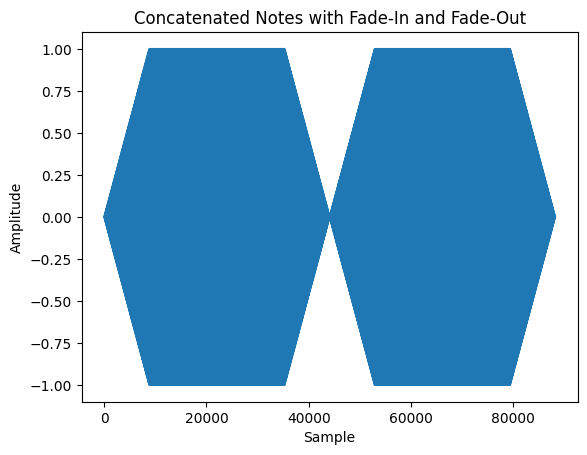

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def generate_note(frequency, duration, fs):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    fade_in = np.linspace(0, 1, int(0.2 * fs), endpoint=False)  # 前 0.1 秒淡入
    fade_out = np.linspace(1, 0, int(0.2 * fs), endpoint=False)  # 後 0.1 秒淡出
    amplitude = np.concatenate([fade_in, np.ones(len(t) - 2 * len(fade_in)), fade_out])
    note = amplitude * np.sin(2 * np.pi * frequency * t)
    return note

def concatenate_notes(notes):
    return np.concatenate(notes)

# 設定音符的頻率、持續時間和取樣率
note1_frequency = 440  # 440 Hz
note2_frequency = 523.25  # 523.25 Hz
note_duration = 1.0  # 1 second
sampling_rate = 44100  # 取樣率

# 生成兩個音符，並應用淡入淡出效果
note1 = generate_note(note1_frequency, note_duration, sampling_rate)
note2 = generate_note(note2_frequency, note_duration, sampling_rate)

# 將兩個音符連接在一起，中間應用淡入淡出效果
concatenated_notes = concatenate_notes([note1, note2])

ipd.display(ipd.Audio(concatenated_notes,rate=sampling_rate))


# 可以使用 Matplotlib 繪製波形圖
plt.plot(concatenated_notes)  # 繪製前 20 毫秒的波形
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Concatenated Notes with Fade-In and Fade-Out')
plt.show()

Piano GUI to input NOTE